In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt



In [40]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\training",
                                        target_size=(200,200)
                                        ,batch_size=3
                                        ,class_mode='binary')

validation_dataset=train.flow_from_directory(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\validation",
                                        target_size=(200,200)
                                        ,batch_size=3
                                        ,class_mode='binary')

Found 142 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [42]:

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)            

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001)
              ,metrics=['accuracy'])

In [44]:
model.fit(train_dataset,
         initial_epoch=0,
         steps_per_epoch=5,
         epochs=30,
         validation_data=validation_dataset)

Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 12.4073 - accuracy: 0.6000 - val_loss: 0.6837 - val_accuracy: 0.5663
Epoch 2/30
5/5 [==============================] - 4s 767ms/step - loss: 0.9825 - accuracy: 0.5333 - val_loss: 0.6189 - val_accuracy: 0.7952
Epoch 3/30
5/5 [==============================] - 4s 758ms/step - loss: 1.1975 - accuracy: 0.6667 - val_loss: 0.5731 - val_accuracy: 0.5663
Epoch 4/30
5/5 [==============================] - 4s 754ms/step - loss: 0.7559 - accuracy: 0.7692 - val_loss: 0.5357 - val_accuracy: 0.9518
Epoch 5/30
5/5 [==============================] - 5s 932ms/step - loss: 1.4977 - accuracy: 0.7333 - val_loss: 0.4959 - val_accuracy: 0.9759
Epoch 6/30
5/5 [==============================] - 4s 880ms/step - loss: 0.4675 - accuracy: 0.8667 - val_loss: 0.3941 - val_accuracy: 0.6265
Epoch 7/30
5/5 [==============================] - 3s 664ms/step - loss: 1.7065 - accuracy: 0.7333 - val_loss: 0.3952 - val_accuracy: 1.0000
Epoch 8/30
5/5 [======

In [45]:
import os.path
if os.path.isfile(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\robotics_model.h5") is False:
    model.save(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\robotics_model.h5")

In [46]:
from tensorflow.keras.models import load_model
robotic_model=load_model(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\robotics_model.h5")

In [47]:
robotic_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)            

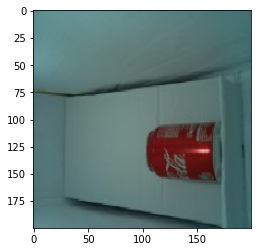

Can


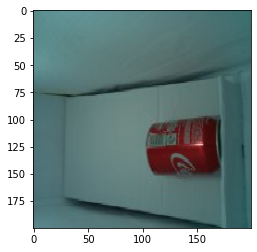

Can


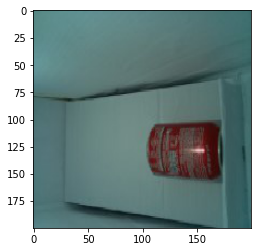

Can


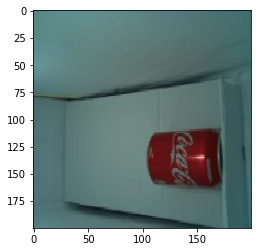

Can


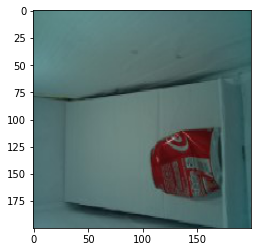

Can


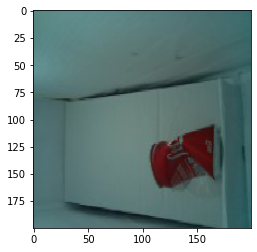

Can


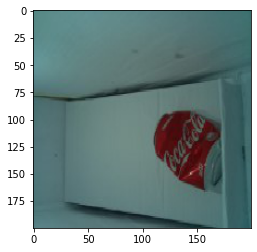

Can


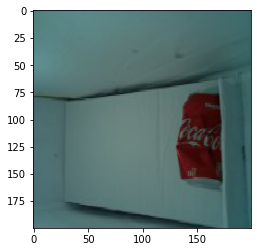

Can


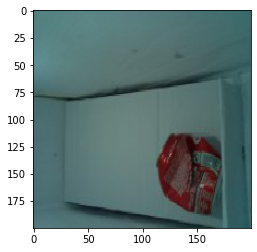

Can


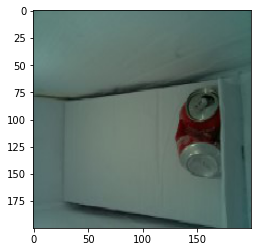

Can


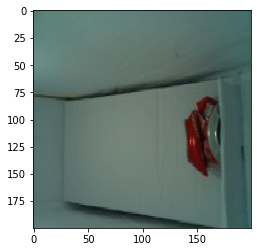

Can


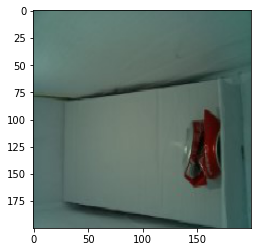

Can


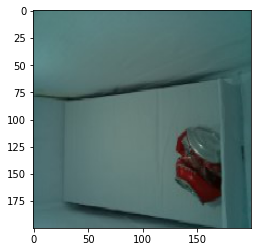

Can


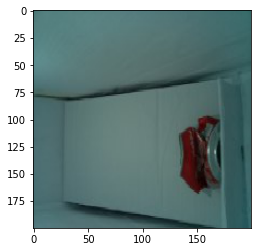

Can


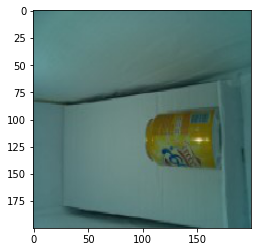

Can


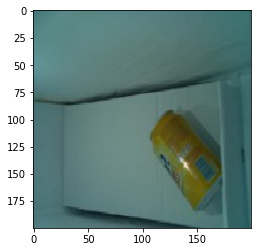

Can


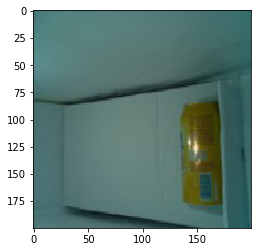

Can


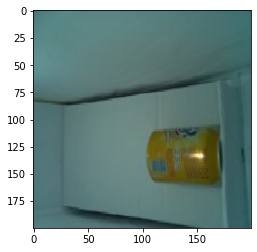

Can


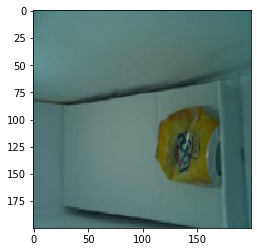

Can


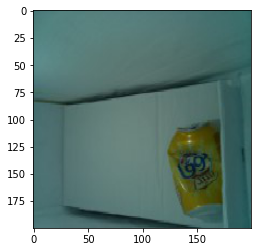

Can


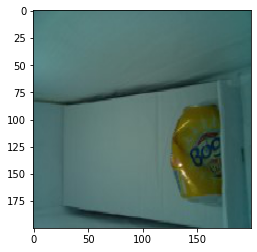

Can


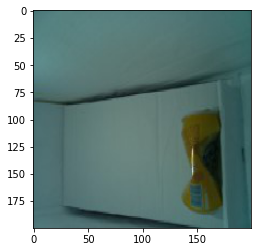

Can


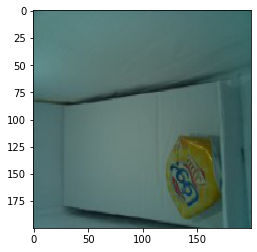

Can


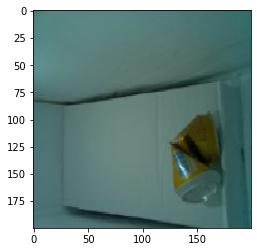

Can


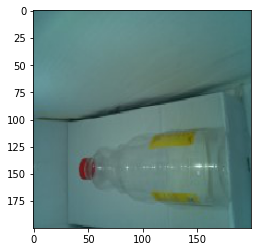

Bottle


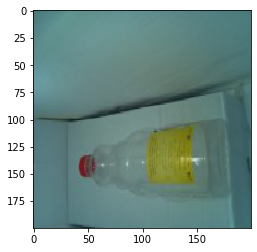

Bottle


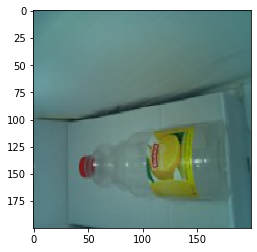

Bottle


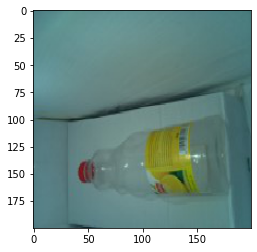

Bottle


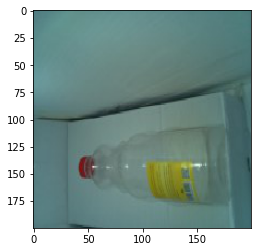

Bottle


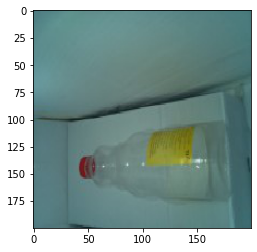

Bottle


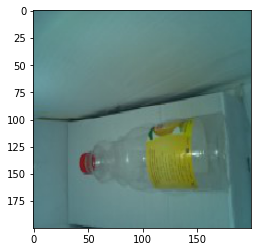

Bottle


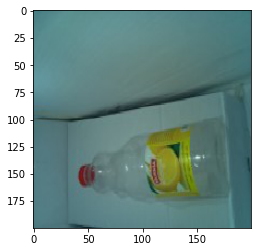

Bottle


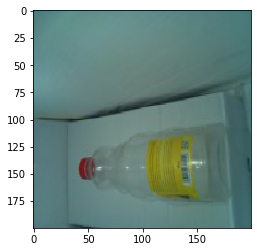

Bottle


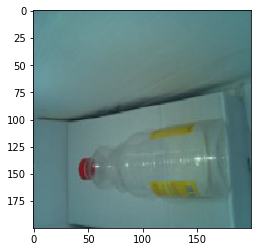

Bottle


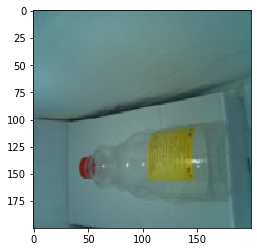

Bottle


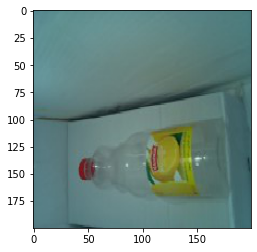

Bottle


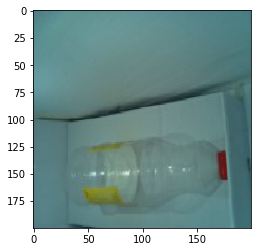

Bottle


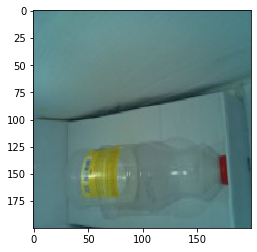

Bottle


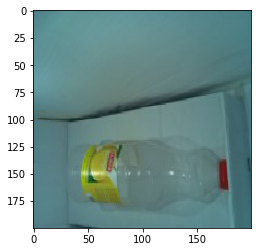

Bottle


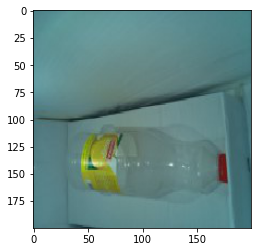

Bottle


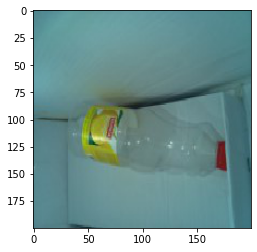

Bottle


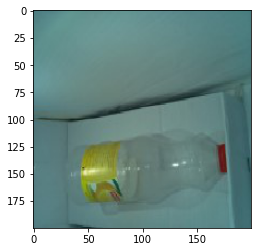

Bottle


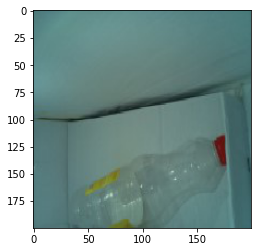

Bottle


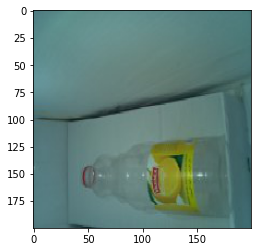

Bottle


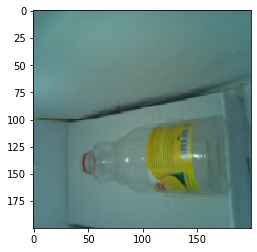

Bottle


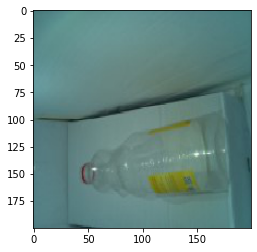

Bottle


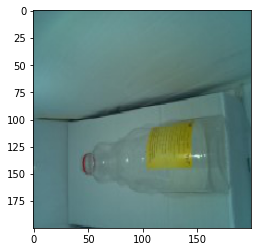

Bottle


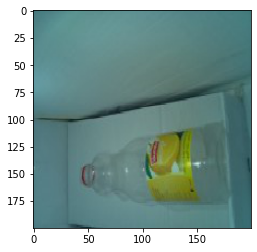

Bottle


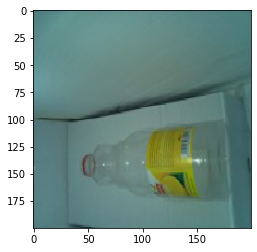

Bottle


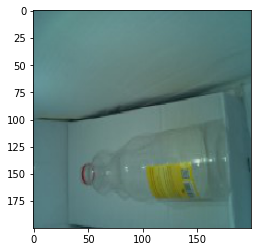

Bottle


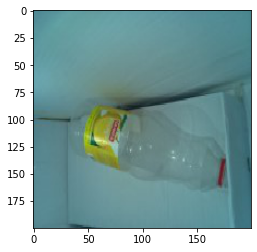

Bottle


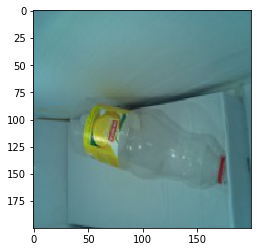

Bottle


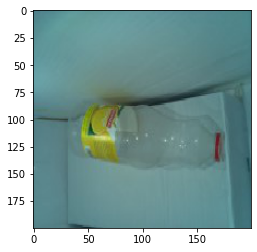

Bottle


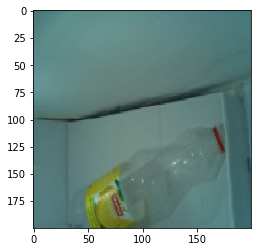

Bottle


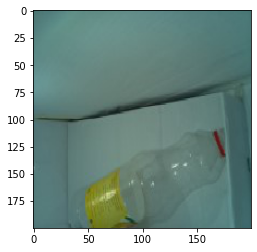

Bottle


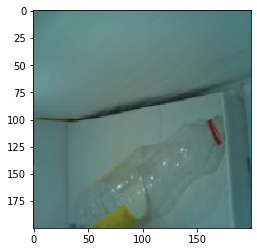

Bottle


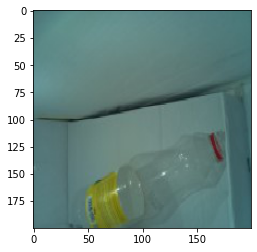

Bottle


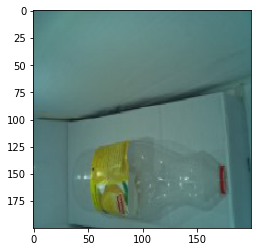

Bottle


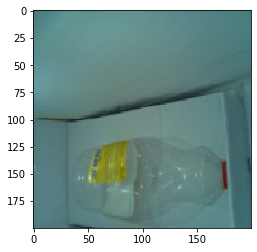

Bottle


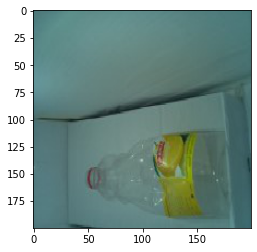

Bottle


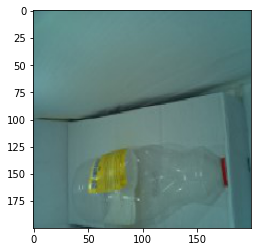

Bottle


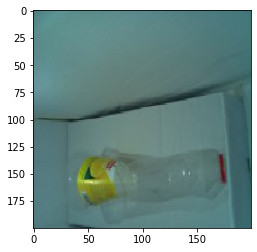

Bottle


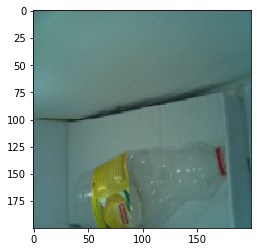

Bottle


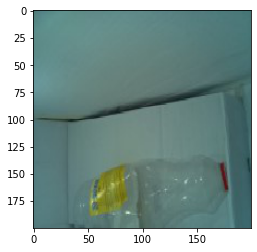

Bottle


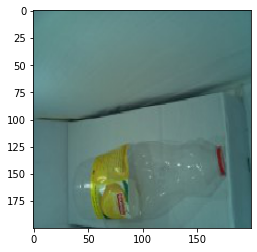

Bottle


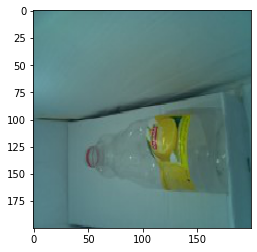

Bottle


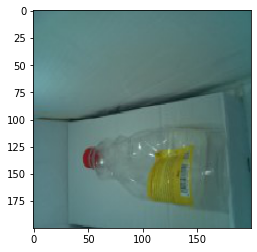

Bottle


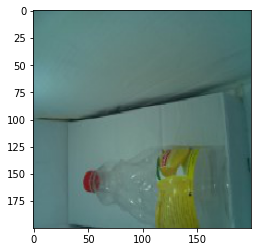

Bottle


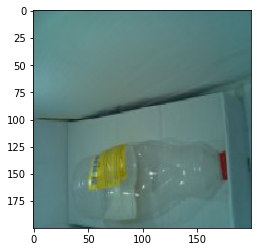

Bottle


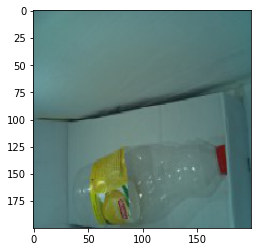

Bottle


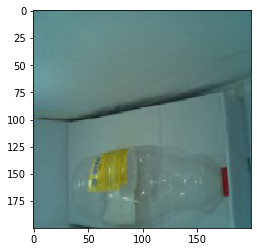

Bottle


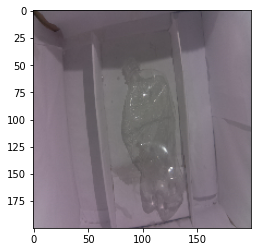

Bottle


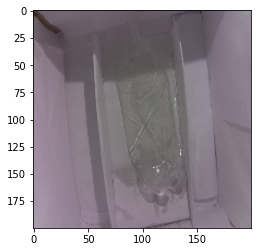

Bottle


In [48]:
dir_path=r'C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\test'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    imgs=np.vstack([X])
    
    ans=robotic_model.predict(imgs)
    
    if (ans==0) :
        print("Bottle")
    
    elif (ans==1):
        print("Can")
    
    